<style>
body h1:before, body h2:before, body h3:before, body h4:before, body h5:before, body h6:before {
  content: "";
  counter-increment: none;
}
</style>

# Week08.2 Team Activity
Due Thursday May 25th, 2023 by 11:59pm - please upload PDF with photograph (either rendered or a separate file).  There is no expectation of completing this during class, in fact, I am trying to get you to practice working outside of class in teams in preparation for the final project.

If you missed class – no credit for this activity, instead, I drop two unexcused absences from the Monday/Wednesday activities before deductions begin.

- **Please identify your team & the names of your teammates.** 

- **Please insert a team photo somewhere in this notebook.  If you cannot get the to render correctly to PDF please upload a separate file of the photo**

- **Please make certain that all of your teammates agree upon and understand the team answers. Thank you.**

Names:

In [2]:
from IPython.display import Image
Image(".jpeg")

## Assignment

If you are with your final project team and have your data, please go ahead and use your final data for this activity.

If you are not on a team or sitting with non-teammates today, please try the following, this is a random forest with numerical outcome (price) I've done the preparation for you:

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

train = pd.read_json("train.json")
train.set_index('building_id', inplace=True)

%matplotlib inline
train.head()

,bathrooms,bedrooms,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
building_id,,,,,,,,,,,,,,
8579a0b0d54db803821a35a4a615e97a,1.0,1,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
b8e75fc949a6cd8225b455648a951712,1.0,2,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
cd759a988b8f23924b5a2058d5ab2b49,1.0,2,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
53a5b119ba8f7b61d4e010512e0dfc85,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
bfb9405149bfff42a92980b594c28234,1.0,0,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


In [14]:
# turn the outcome into categories
train['interest_level'] =  pd.Categorical(
    train['interest_level'], 
    categories=["low", "medium", "high"], ordered=True
)

## Add additional features to this list

Please add additional features to the model.  I've only included location (lon/lat) but there are others.  I didn't talk about RandomForestRegressor (numerical outcome) so here is the model (followed by an explanation):

In [20]:
feature_names = ['longitude', 'latitude', 'bedrooms', 'price']
train_sub = train[feature_names]
X_train, y_train = train_sub.drop('price',axis=1), train_sub['price']
rf = RandomForestRegressor(
         n_estimators=100,
         min_samples_leaf=1,
         n_jobs=-1)

n_estimators: This is the number of trees in the forest. In this case, 100 trees will be estimated.

min_samples_leaf: This is the minimum number of samples required to be at a leaf node. The algorithm won't allow a split that leaves fewer than this number of samples in a node.

n_jobs: The number of jobs to run in parallel for both fit and predict. If -1, then the number of jobs is set to the number of cores.

## Fit your model

In [21]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

## Examine the results

Example, check the feature importance (you should add more variables and modify the graphic) and what do you conclude about the real estate features and price?

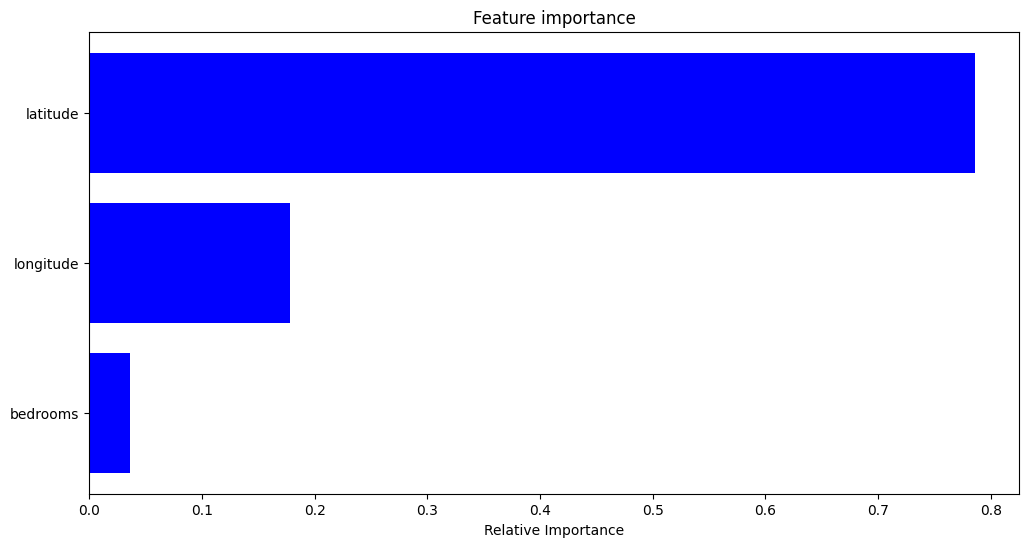

In [22]:
feature_importance = rf.feature_importances_[0:3]
indices = np.argsort(feature_importance)

plt.figure(figsize=(12, 6))
plt.title("Feature importance")
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

There are more things you could do, for example, predict price using the test data.

3.  Can your team modify this model to examine the categorical outcome "interest_level"?  If yes, how does the model for interest_level differ from price with respect to variables like location and the features of the rental unit.

Please remember to take a team photo.
 

## What to submit for credit

- Please upload the Jupyter Notebook (.ipynb) and PDF (preferred) OR .html (OK) to Bruin Learn with your team attempt.  Please make sure every team member understands the contents of the notebook.  

- This is due before 11:59pm Thursday 5/25/2023 